## Análisis de Particle Swarm en Paralelo

El proyecto que se está desarrollando considera obtener las rutas óptimas de alrededor de $900$ fuerzas de venta que colaboran en la Financiera. Derivado de este volumen de fuerzas de venta, se implementó la ejecución en paralelo de forma que el cálculo de las rutas óptimas sea divido conforme al número de cores del equipo con el que se esté trabajando. En este notebook se realizará la ejecución considerando 4, 8 y 12 cores; y se comparán los tiempos de ejecución.

In [1]:
# Librerías
import Control as ctl
import multiprocessing
import Utileria as ut
from models import particle_swarm as ps

In [2]:
# Se elimina las rutas óptimas existentes en la base de datos
conn = ut.CrearConexionRDS()
ut.EjecutarQuery(conn,"delete from trabajo.resultados where algoritmo = 'PS';")

-1

In [3]:
# Definición de hiperparámetros
dict_Hiper_PS = {'Iteraciones': 10,
                 'Particulas': 10,
                 'Alfa': .9,
                 'Beta': 1
                }

# Se instancia el objeto control
objControl = ctl.Control()

### Ejecución en Paralelo con 4 cores

In [4]:
# Se establece el número de cores a utilizar
objControl.setCoresUso(4)
objControl.getCoresUso()

4

In [5]:
%%time

# División de la lista de empleados conforme al número de cores disponibles
objControl.CalcularRutasPar(ps.ParticleSwarm, objControl.dict_Hiper_PS)

35673
CPU times: user 10.6 ms, sys: 2.96 ms, total: 13.5 ms
Wall time: 1.19 s


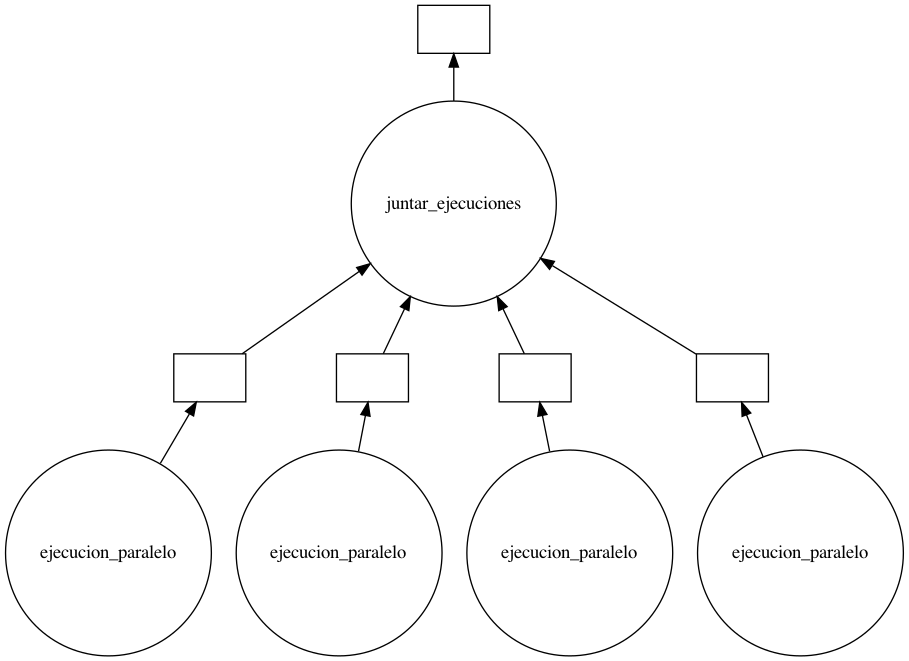

In [6]:
# Visualización de la división de tareas conforme al número de cores
objControl.grafo_Ejecucion.visualize()

In [7]:
%%time

# Ejecución del cálculo de las rutas en paralelo
objControl.grafo_Ejecucion.compute()

CPU times: user 18.7 s, sys: 2.16 s, total: 20.9 s
Wall time: 9min 13s


([0, 0, 0, 0],)

### Ejecución en Paralelo con 8 cores

In [8]:
# Se establece el número de cores a utilizar
objControl.setCoresUso(8)
objControl.getCoresUso()

8

In [9]:
# Se elimina los rutas óptimas existentes en la base de datos
conn = ut.CrearConexionRDS()
ut.EjecutarQuery(conn,"delete from trabajo.resultados where algoritmo = 'PS';")

-1

In [10]:
%%time

# División de la lista de empleados conforme al número de cores disponibles
objControl.CalcularRutasPar(ps.ParticleSwarm, objControl.dict_Hiper_PS)

35673
CPU times: user 8.72 ms, sys: 2.47 ms, total: 11.2 ms
Wall time: 1.1 s


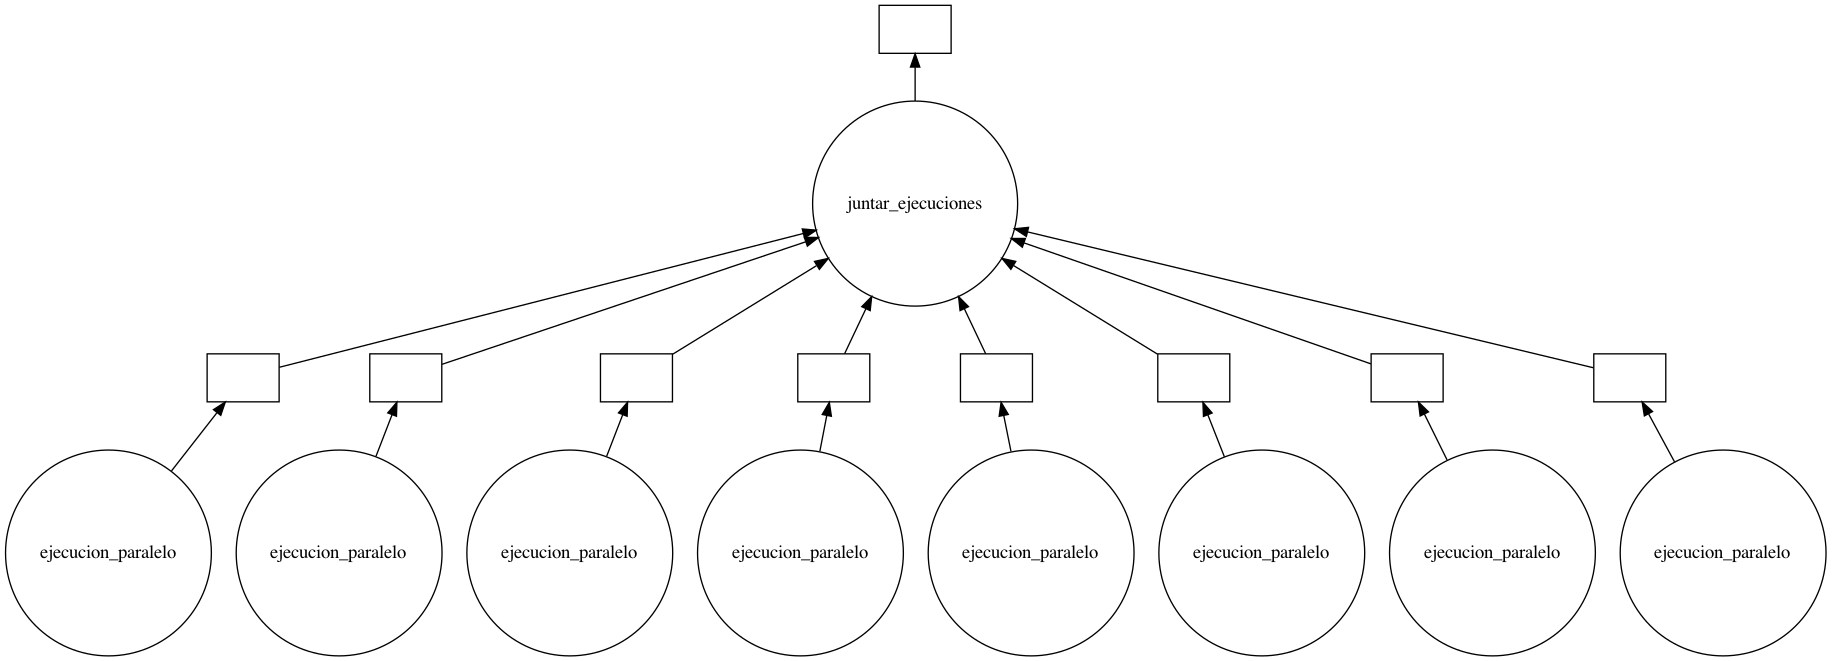

In [11]:
# Visualización de la división de tareas conforme al número de cores
objControl.grafo_Ejecucion.visualize()

In [12]:
%%time

# Ejecución del cálculo de las rutas en paralelo
objControl.grafo_Ejecucion.compute()

CPU times: user 17.8 s, sys: 2.05 s, total: 19.8 s
Wall time: 4min 18s


([0, 0, 0, 0, 0, 0, 0, 0],)

### Ejecución en Paralelo con 12 cores

In [13]:
# Se establece el número de cores a utilizar
objControl.setCoresUso(12)
objControl.getCoresUso()

12

In [14]:
# Se elimina los rutas óptimas existentes en la base de datos
conn = ut.CrearConexionRDS()
ut.EjecutarQuery(conn,"delete from trabajo.resultados where algoritmo = 'PS';")

-1

In [15]:
%%time

# División de la lista de empleados conforme al número de cores disponibles
objControl.CalcularRutasPar(ps.ParticleSwarm, objControl.dict_Hiper_PS)

35673
CPU times: user 10.7 ms, sys: 2.34 ms, total: 13 ms
Wall time: 1.14 s


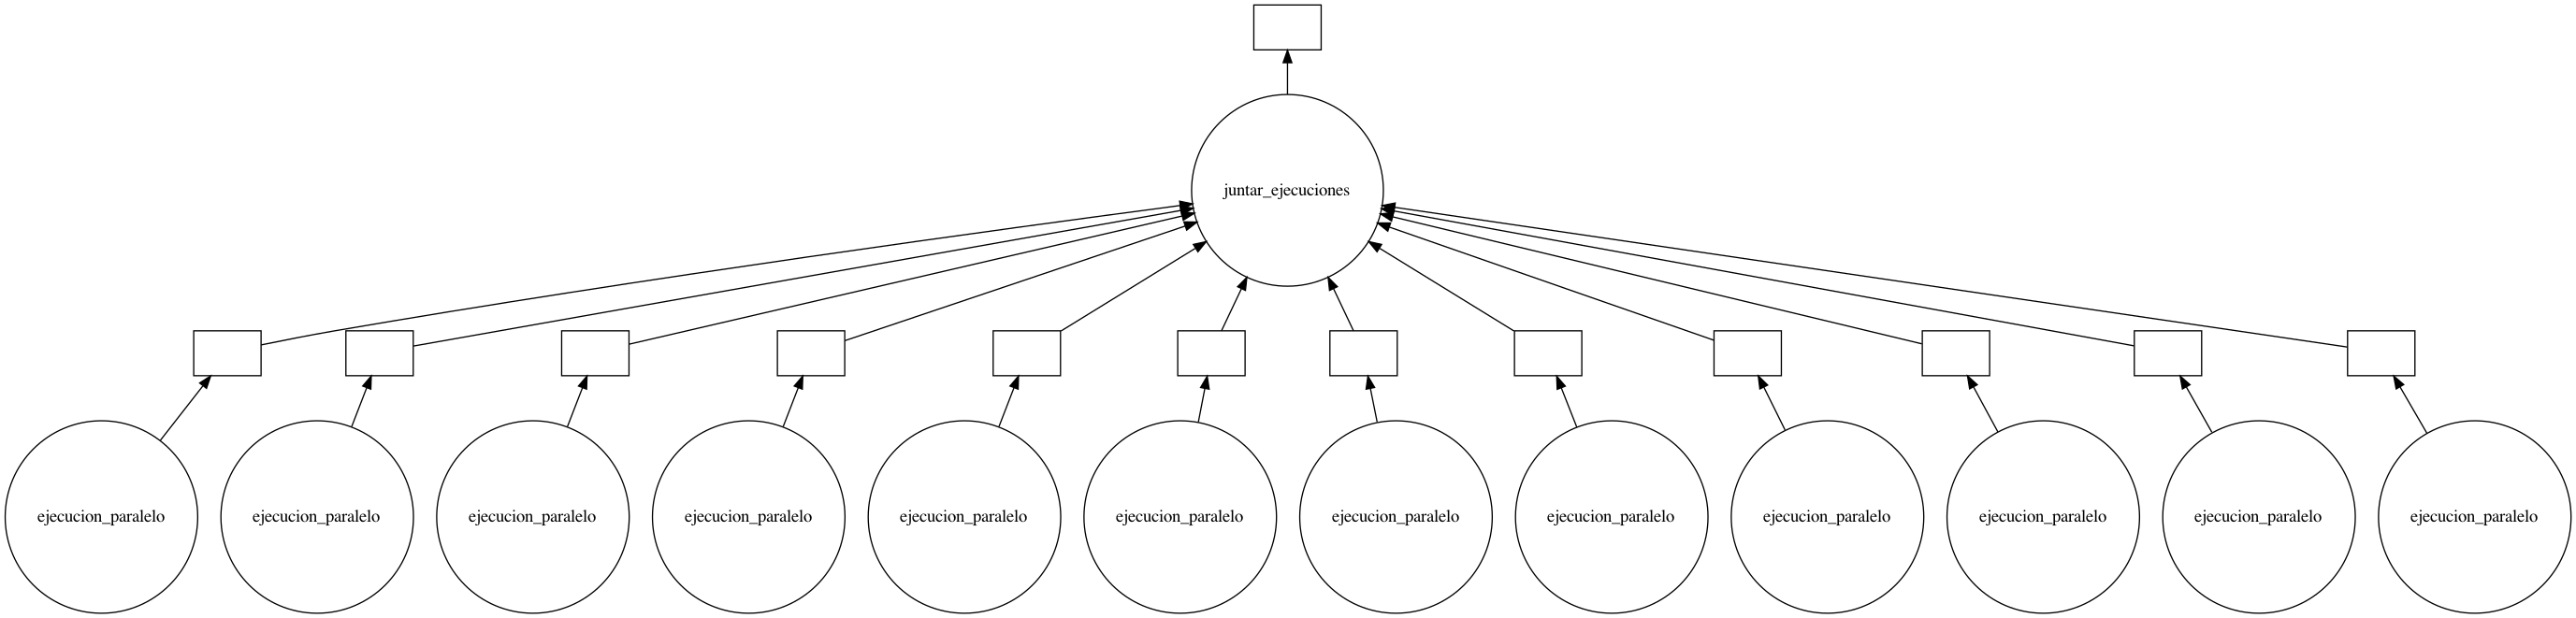

In [16]:
# Visualización de la división de tareas conforme al número de cores
objControl.grafo_Ejecucion.visualize()

In [17]:
%%time

# Ejecución del cálculo de las rutas en paralelo
objControl.grafo_Ejecucion.compute()

CPU times: user 17.6 s, sys: 2.02 s, total: 19.7 s
Wall time: 3min 1s


([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],)

### Conclusiones

A manera de resumen se presentan los tiempos de ejecución para los distintos números de cores:

| Número de cores | Tiempo ejecución |
|:---------------:|:----------------:|
| 4               | 9min 13s         |
| 8               | 4min 18s         |
| 12              | 3min 1s          |

Se observa que al aumentar el número de cores, el tiempo de ejecución disminuye. Esta disminución  es del $53.35\%$ de 4 a 8 cores y del $30\%$ de 8 a 12 cores, es decir, la disminución en el tiempo de ejecución no es linealmente proporcial al número de cores.